# <center> 2022 Kaggle Machine Learning and Data Science Survey Analytics <center>

In [1]:
import numpy as np
import pandas as pd 
import re

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

sns.set_palette('rocket',5)

<div>
<img src="computer.png" width="500"/>
</div>

---

###  <center> Analyzing the Kaggle Survey questions/response 2022 <center>
    
`23997` international survey participants responded to the **Kaggle Survey 2022**. Participants were given `44` questions to answer, which covered various topics relating to their data scientist journey. Topics include, but are not limited to, their educational and professional backgrounds, the courses chosen to hone data science skills, coding experience, the preferred data science tools used for competitions and work, as well as related disciplines that they are involved, such as cloud computing and databases.

The original dataset contains responses to various question types like multiple selection questions (eg, select the data products you often use - all that apply), multiple choice single selection question (eg. age-range), true-false question (eg, are you a student?). The multiple selection questions, also known as select all that apply, are the most popular question type in this survey. This type of question leaves the survey more open-ended, given that every (aspiring or seasoned) data scientist experience is unique. On such questions, sometimes a *None* selection is offered, and respondent chooses it. That leaves the other categories for that question blank or *NaN*. Other times, they select multiple options for a given question. The missing values, denoted by *NaN*, in most cases do not obscure our analysis, as we are likely to perform data aggregation rather than evaluate individual user experience. Besides, *NaN* in most simply means not selected so it is assigned to zero value or blank.

The outcome of the survey should provide insights, which may not be obvious immediately, but having an initial business objective can help navigate through the noise of the dataset through formulating an initial hypothesis, testing that hypothesis, drawing a conclusion and then repeating the process until objective is met. It is also worthy to mention that depending on the business use case, each use case may require different methods of preparation, presentation and analysis from another case.  There is a no one-size-fit-all data analysis solution and insights that are equally actionable across all use cases. That is why a good business problem statement is as important as its final solution, even if it changes over the course of our data science project, at least it ensures that we set out on the right track instead of going out on a random walk exercise. 

Here I will illustrate an example from this survey analysis why there is a no one-size fit all data analysis solution and how lack of data understanding may lead to non-optimal decision making. `30.7%` of Chinese respondents cite that they use Kaggle Learn Courses, the highest percentage compared to other geographies. For Indian respondents, only `25.0%` use that learning platform. However, there are `8792` respondents from India and only `453` from China. There are more respondents from India than from China. If the UX Design team wants to improve the learning experience on the platform, they should pay attention to the number of user on the platform rather than the percentage. However, if marketing wants to analyze the market share of course learning platforms, they may use `30.7%` to justify that Kaggle Learn has a higher market share than other courses in China, taking into account two caveats that may have inflated the values for China. Firstly, the survey population from China is way lower than the other countries, so the responses may be from a biased sample and secondly, some of the listed learning options may not be accessible to China due to regulation and restrictions imposed by the government - for example, the popular Coursera platform is inaccessible in China.

Another way of enriching the insights derived from the survey response to drive a business case is by envisioning Kaggle relationship with its customer as a value chain. If you represent each Kaggle user as being part of a value chain, each Kaggle offers differentiated products and services to us (customers) who are part of this value chain. It seems logical and methodical to segment the data scientist journey the same way companies have different product offerings catering to different customer segments. Already we have observed Kaggle encouraging segmentation in user engagement, as seen in the categories of `Competitions`, `Dataset`, `Notebooks` and `Discussions` and then awarding users with ranking points depending on their level of engagement or competence in each of these categories.

Typically, the data scientist journey begins from learning courses, to the competition platform, to familiarity with deployed ML technologies (like cloud or on-premise solutions, to data science specializations like natural language processing, computer vision, neural network research, sometimes complemented by professional work experience in specific industries). Kaggle, as a company, has positioned its expertise well, in hosting data science competition but participating in competitions is only one stage of the data scientist journey. Is Kaggle keen on offering more to its large existing user base - Kaggle could be thought of to be the "Home for Data Scientists"), such as offering new products, upselling or cross-selling products. For example, after focusing on a key user group (junior data scientist with 3 to 5 years work experience), we noticed that many of these users also possess either basic or some skills in cloud computing technologies but don't know exactly how to integrate their data modeling finesse with real-world machine learning technologies. This observation could be followed up with a study group initiated by Kaggle to understand the skills gap between real world data science versus the sandbox. With recommendations from this follow up study, Kaggle may work with their partners or develop in-house expertise to offer new products to bridge the gap. On upselling and cross-selling product strategies, an example could be a use case where existing Kaggle competition participants (`Novice` and `Expert`) who want to improve their competition ranking but don't know how to and Kaggle can work with its network of competition `Grandmaster` or `Master` to offer masterclasses on the Kaggle learning platform for a modest fee on a new premium option.

Hope that the above discussion offers a short summary of Kaggle's business and set up a case for the survey analysis. **Let's get started!**

##  <center> Initial Business Objective <center>
**Target group**: Many Data Science newcomers who are entering the space with little or no experience in coding and/or machine learning libraries are using low to no code data solutions to deliver products in industry. Typically, they do not have software engineering work experience so companies assign them to projects that involve little to no coding. 

**Problem Statement**: My hypothesis is that this target group will have the highest attrition rate on the Kaggle platform; they will become inactive users after they start working in industry, where they find their coding and machine learning knowledge less relevant to the job. Explore this trend from the survey data. 

**Motivation**: The data science community to develop and foster new talent, through an onboarding and engagement process that promotes continuity and lower the attrition rate.

##  <center> Survey Insights sections <center>
* [Top Data Science and Machine Learning Course Platforms](#courses)
* [Preferred Programming Language by Data Scientist](#languages)
* [Preferred Machine Learning Framework](#framework)
* [Deploying Machine Learning models at work](#production)

## 0. Glossary - Kaggle Survey Questions

|Nr |Question                                 |Nr |Question                                           |Nr |Question                                           |
|---|:----------------------------------------|---|:--------------------------------------------------|---|:--------------------------------------------------|
|Q1 |Duration                                 |Q16|how many years you use ML libraries                |Q31|which cloud platform you use                       |
|Q2 |your age                                 |Q17|which ML frameworks you regularly use              |Q32|which is your preferred cloud provider             |
|Q3 |your gender                              |Q18|which ML algo you regularly use                    |Q33|which cloud provider you use                       |
|Q4 |resident_country                         |Q19|which computer vision library you use              |Q34|which data storage you use                         |
|Q5 |are you student                          |Q20|which NLP methods you regularly use                |Q35|which data products (databases) you use            |
|Q6 |most popular course platform             |Q21|which pretrained model weights you use             |Q36|which BI tools you use                             |
|Q7 |most helpful product or platform         |Q22|which ML hubs or repo your use                     |Q37|which ML cloud you use                             |
|Q8 |your highest degree or formal education  |Q23|what job title                                     |Q38|which AutoML you use                               |
|Q9 |did you publish paper                    |Q24|which industry                                     |Q39|which product you use to serve your ML model       |
|Q10|did you publish paper related to ML      |Q25|how big is your company                            |Q40|what tools you use to monitor ML model             |
|Q11|how long is your programming experience  |Q26|how many people you manage                         |Q41|which responsible AI or ML practice you use        |
|Q12|what is your regular programming language|Q27|is your company exploring ML methods               |Q42|which hardware you use for ML training             |
|Q13|what is your regular IDE                 |Q28|what are the important activities at work          |Q43|how many times you use TPU                         |
|Q14|which hosted notebook products you use   |Q29|how much your pay                                  |Q44|which preferred social media outlet on data science|
|Q15|which data visualization library you use |Q30|how much spent on ML compute in last 5 years       |                                                      |

In [2]:
# df = pd.read_csv('../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv')
df = pd.read_csv('kaggle_survey_2022_responses.csv')

In [3]:
df.iloc[1:,:].shape

(23997, 296)

In [4]:
header = df.iloc[:1,:].T.reset_index()
header.columns = ['qn_idx', 'Question']

regexp = '(.*?)\(select\sall\sthat\sapply\) -|selected choice -\s'

header.Question = header.Question.apply(lambda x: x.lower())
header['MSQ'] = header.Question.apply(lambda x: True if ' selected choice - ' in x else False)
header['Topic'] = header.Question.apply(lambda x: re.sub(regexp,'',x))
header.MSQ = header.Question.apply(lambda x: True if 'select all that apply' in x else False)
header['Category'] = header.qn_idx.apply(lambda x: re.sub(r'\_\d+','',x)[1:] if x[0] == 'Q' else 1)
header.Category = header.Category.astype(int)
header.Topic = header.Topic.apply(lambda x: x.rstrip().lstrip())

In [5]:
# REMOVE FIRST ROW 
df = df.iloc[1:,:]

df.columns = header['Topic'].tolist()
col_names = df.columns[5:]
col_names = ['duration', 'age', 'gender', 'resident_country', 'is_student'] + col_names.tolist()
df.columns = col_names

In [6]:
is_msq = header['MSQ'].tolist()

# Data Cleaning
for col,e in enumerate(is_msq):
    if e:
        df.iloc[:,col] = df.iloc[:,col].apply(lambda x: 1 if x is not np.nan else 0)

## 0.1 Data Visualization functions

In [7]:
def show_factor_plot(df, X, Y, H, xlabel, ylabel, TITLE):
    '''
    displays multiple category bar plots
    '''
    ax = sns.factorplot(data=df,x=X, y=Y,hue=H,kind = 'bar', height = 4, aspect = 15/8)
    ax = plt.gca()
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%.1f' % float(p.get_height()), 
                fontsize=8, color='black', ha='center', va='bottom')
    plt.title(TITLE, fontsize=10)
    plt.xticks(rotation = 0)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.show()

def show_bar_plot(df, X, Y, xlabel, ylabel):
    '''
    displays bar plots
    '''
    plt.figure(figsize=(10,5))
    ax = sns.barplot(data=df,x=X, y=Y)
    ax.bar_label(ax.containers[0])
    plt.title(TITLE, fontsize=15)
    plt.xticks(rotation = 0)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.show()

<a id='courses'></a>

## 1. Top Data Science and Machine Learning Course Platforms

In [8]:
CAT_SELECT = 6

select_bool = np.array(header['Category']==CAT_SELECT)
df_rpt = pd.concat([df.iloc[:,:4],df.iloc[:,select_bool]],axis=1)

In [9]:
pop = df_rpt.groupby(['resident_country'])['resident_country'].count()

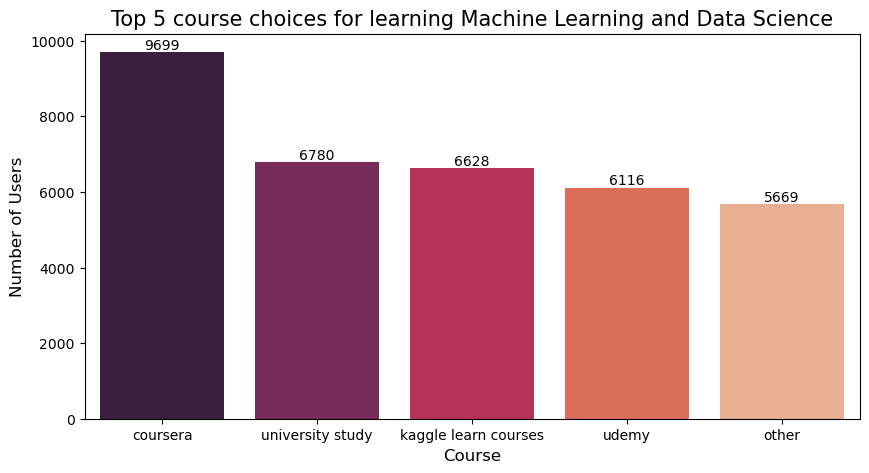

In [10]:
TITLE = 'Top 5 course choices for learning Machine Learning and Data Science'
groupDF = df_rpt.iloc[:,4:].sum().reset_index(name='count')
groupDF = groupDF.replace('university courses (resulting in a university degree)','university study')
groupDF = groupDF.sort_values(by='count',ascending=False).head()

show_bar_plot(groupDF, 'index', 'count', 'Course', 'Number of Users')

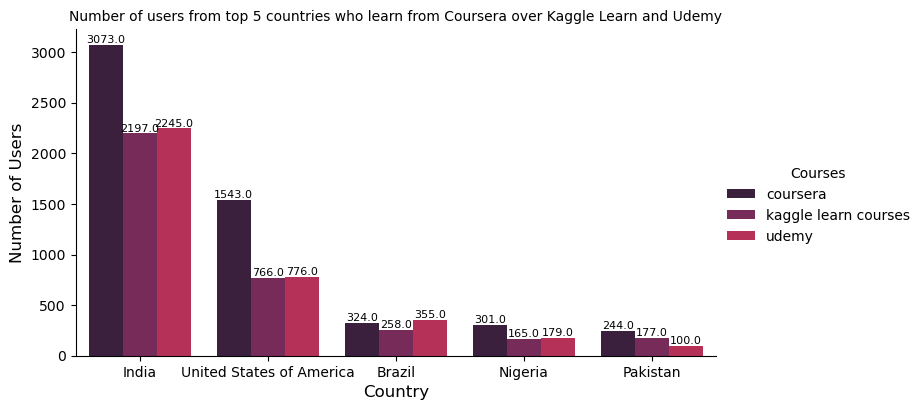

In [11]:
groupDF = df_rpt.groupby(['resident_country']).sum()
groupDF = groupDF.sort_values(by = 'coursera', ascending = False).reset_index()

TITLE = 'Number of users from top 5 countries who learn from Coursera over Kaggle Learn and Udemy'

groupDF = groupDF[groupDF['resident_country'] != 'Other'].head(5)
groupDF = pd.melt(groupDF, id_vars= ['resident_country'], 
                  value_vars = ['coursera','kaggle learn courses', 'udemy'],
                 var_name ='Courses', value_name ='count')

show_factor_plot(groupDF, 'resident_country','count', 'Courses','Country','Number of Users',TITLE)

In [12]:
groupDF = df_rpt.groupby(['resident_country']).sum()
groupDF = groupDF.apply(lambda x: 100*x/pop).sort_values(by='coursera', ascending= False).reset_index()

groupDF[(groupDF['resident_country'].isin(['India','China']))]

,resident_country,coursera,edx,kaggle learn courses,datacamp,fast.ai,udacity,udemy,linkedin learning,"cloud-certification programs (direct from aws, azure, gcp, or similar)",university courses (resulting in a university degree),none,other
45,India,34.952229,7.142857,24.988626,8.621474,2.888990,5.152411,25.534577,10.043221,6.585532,23.94222,12.659236,31.073703
54,China,28.256071,6.181015,30.684327,7.505519,4.856512,4.194260,2.869757,4.635762,3.532009,39.95585,15.452539,18.763797


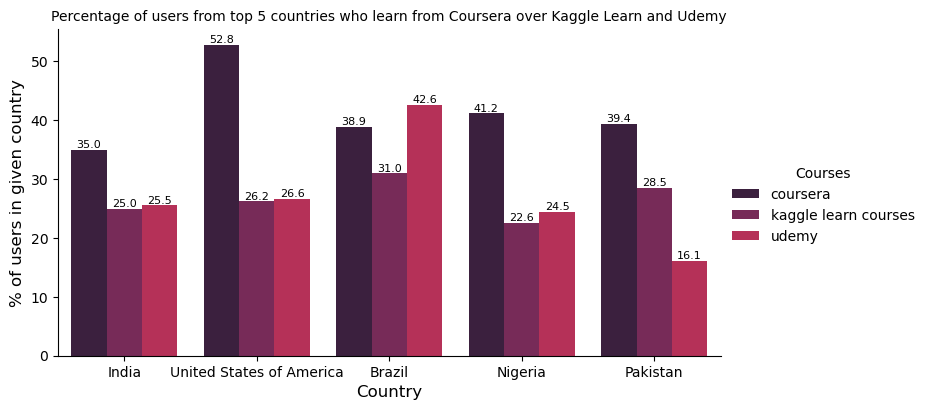

In [13]:
ordered_countries = ['India', 'United States of America', 'Brazil', 'Nigeria', 'Pakistan']
groupDF = groupDF[groupDF['resident_country'].isin(ordered_countries)]

order = dict(zip(ordered_countries,list(range(1,6))))
groupDF['order']= groupDF.resident_country.apply(lambda x:order.get(x))
groupDF.sort_values(by='order', ascending=True, inplace=True)

TITLE = 'Percentage of users from top 5 countries who learn from Coursera over Kaggle Learn and Udemy'
groupDF = pd.melt(groupDF, id_vars= ['resident_country'], 
                  value_vars = ['coursera','kaggle learn courses', 'udemy'],
                 var_name ='Courses', value_name ='count')

show_factor_plot(groupDF, 'resident_country','count', 'Courses','Country','% of users in given country',TITLE)

<a id='languages'></a>
## 2. Preferred Programming Language for Data Science

In [14]:
popAge = df_rpt.groupby(['age'])['age'].count()

In [15]:
CAT_SELECT = 12

select_bool = np.array(header['Category']==CAT_SELECT)
df_rpt = pd.concat([df.iloc[:,:4],df.iloc[:,select_bool]],axis=1)

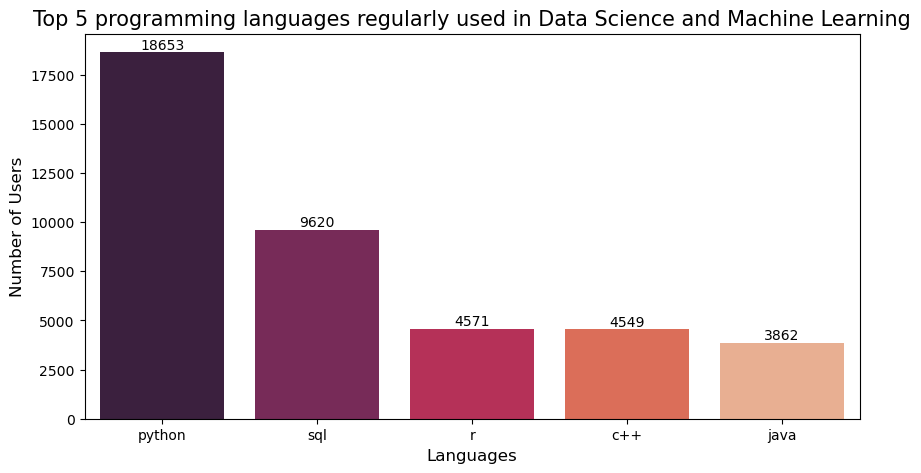

In [16]:
TITLE = 'Top 5 programming languages regularly used in Data Science and Machine Learning'
groupDF = df_rpt.iloc[:,4:].sum().reset_index(name='count')
groupDF = groupDF.sort_values(by='count',ascending=False).head()

show_bar_plot(groupDF, 'index', 'count', 'Languages', 'Number of Users')

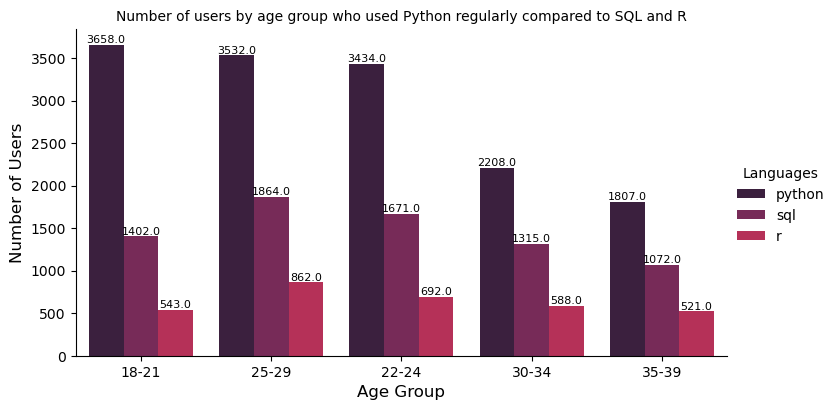

In [17]:
groupDF = df_rpt.groupby(['age']).sum()
groupDF = groupDF.sort_values(by = 'python', ascending = False).reset_index()

TITLE = 'Number of users by age group who used Python regularly compared to SQL and R'

groupDF = pd.melt(groupDF.head(), id_vars= ['age'], 
                  value_vars = ['python','sql', 'r'],
                 var_name ='Languages', value_name ='count')

show_factor_plot(groupDF, 'age', 'count', 'Languages','Age Group','Number of Users',TITLE)

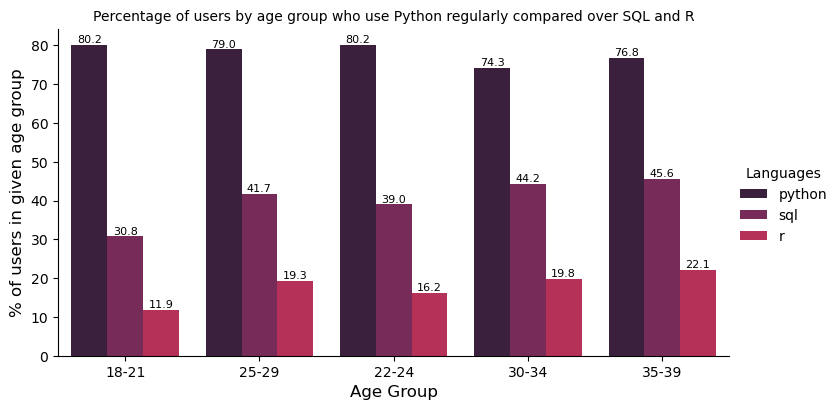

In [18]:
groupDF = df_rpt.groupby(['age']).sum()
groupDF = groupDF.apply(lambda x: 100*x/popAge).sort_values(by='python', ascending= False).reset_index()

ordered_age = ['18-21', '25-29', '22-24', '30-34', '35-39']
groupDF = groupDF[groupDF['age'].isin(ordered_age)]

order = dict(zip(ordered_age,list(range(1,6))))
groupDF['order']= groupDF.age.apply(lambda x:order.get(x))
groupDF.sort_values(by='order', ascending=True, inplace=True)

TITLE = 'Percentage of users by age group who use Python regularly compared over SQL and R'

groupDF = pd.melt(groupDF.head(), id_vars= ['age'], 
                  value_vars = ['python','sql', 'r'],
                 var_name ='Languages', value_name ='count')

show_factor_plot(groupDF, 'age', 'count', 'Languages','Age Group','% of users in given age group',TITLE)

<a id='framework'></a>
## 3. Preferred Machine Learning Framework

In [71]:
CAT_SELECT = 17

df.rename(columns = {'for how many years have you been writing code and/or programming?':'yrs_code_exp'}, inplace=True)
select_bool = np.array(header['Category']==CAT_SELECT)
select_bool[df.columns.get_loc('yrs_code_exp')] = True
df_rpt = pd.concat([df.iloc[:,:4],df.iloc[:,select_bool]],axis=1)

popCodeExp = df_rpt.groupby(['yrs_code_exp'])['yrs_code_exp'].count()

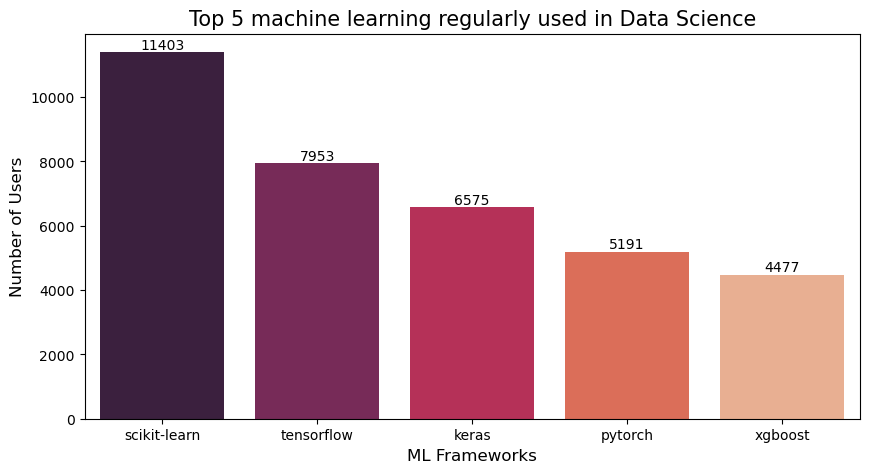

In [72]:
TITLE = 'Top 5 machine learning regularly used in Data Science'

groupDF = df_rpt.iloc[:,4:].sum().reset_index(name='count')
groupDF = groupDF.sort_values(by='count',ascending=False).head()

show_bar_plot(groupDF, 'index', 'count', 'ML Frameworks', 'Number of Users')

In [73]:
groupDF = df_rpt.groupby(['yrs_code_exp']).sum()
groupDF.columns = groupDF.columns.str.replace('\s','')
groupDF = groupDF.sort_values(by = 'scikit-learn', ascending = False).reset_index()
# groupDF = groupDF.reset_index()
groupDF.iloc[1:,:]

,yrs_code_exp,scikit-learn,tensorflow,keras,pytorch,fast.ai,xgboost,lightgbm,catboost,caret,tidymodels,jax,pytorchlightning,huggingface,none,other
1,3-5 years,2198,1582,1368,1083,142,954,433,276,165,108,52,225,320,185,80
2,< 1 years,1934,1165,838,603,66,573,174,138,85,67,39,126,64,638,136
3,5-10 years,1652,1162,1008,890,100,737,390,195,172,120,48,182,290,135,71
4,10-20 years,1119,786,698,582,79,532,264,140,99,66,27,117,198,115,75
5,20+ years,941,725,619,540,95,439,212,102,109,57,30,97,156,116,102
6,I have never written code,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
print('*'*110)
print('Table Summary of total users with given years of coding experience who have used machine learning frameworks')
print('*'*110)

# Note that rows will not sum up to the total because every participant can choose more than 1 ML framework which they use regularly

pd.concat([pd.DataFrame(popCodeExp).rename(columns={'yrs_code_exp':'total participants'}).T,groupDF.set_index('yrs_code_exp').T])

**************************************************************************************************************
Table Summary of total users with given years of coding experience who have used machine learning frameworks
**************************************************************************************************************


yrs_code_exp,1-3 years,10-20 years,20+ years,3-5 years,5-10 years,< 1 years,I have never written code
total participants,6459,1801,1537,3399,2556,5454,2037
scikit-learn,3559,1119,941,2198,1652,1934,0
tensorflow,2533,786,725,1582,1162,1165,0
keras,2044,698,619,1368,1008,838,0
pytorch,1493,582,540,1083,890,603,0
fast.ai,166,79,95,142,100,66,0
xgboost,1242,532,439,954,737,573,0
lightgbm,467,264,212,433,390,174,0
catboost,314,140,102,276,195,138,0
caret,191,99,109,165,172,85,0


In [75]:
groupDF = df_rpt.groupby(['yrs_code_exp']).sum()
groupDF.columns = groupDF.columns.str.replace(' ','')
groupDF = groupDF.apply(lambda x: 100*x/popCodeExp).reset_index()

# select columns for display
select = ['yrs_code_exp','scikit-learn','tensorflow','pytorch','xgboost']
groupDF[select]

,yrs_code_exp,scikit-learn,tensorflow,pytorch,xgboost
0,1-3 years,55.101409,39.216597,23.115033,19.228983
1,10-20 years,62.132149,43.642421,32.315380,29.539145
2,20+ years,61.223162,47.169811,35.133377,28.562134
3,3-5 years,64.666078,46.543101,31.862312,28.067079
4,5-10 years,64.632238,45.461659,34.820031,28.834116
5,< 1 years,35.460213,21.360469,11.056106,10.506051
6,I have never written code,0.000000,0.000000,0.000000,0.000000


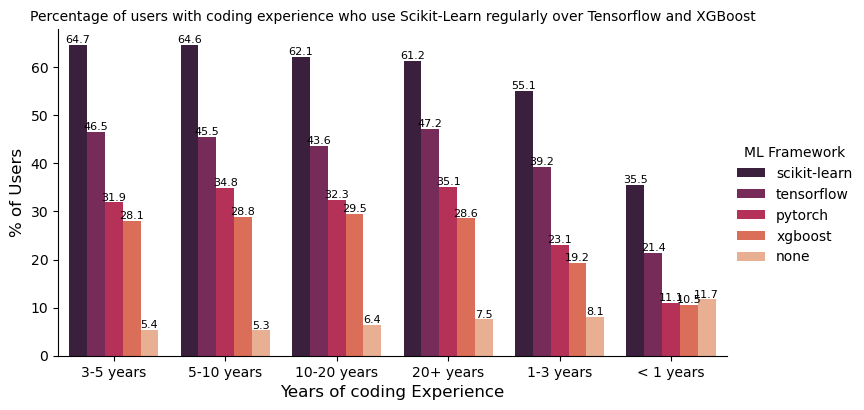

In [76]:
TITLE = 'Percentage of users with coding experience who use Scikit-Learn regularly over Tensorflow and XGBoost'
groupDF = pd.melt(groupDF.head(6), id_vars= ['yrs_code_exp'], 
                  value_vars = ['scikit-learn','tensorflow', 'pytorch', 'xgboost','none'],
                 var_name ='ML Framework', value_name ='count')


groupDF = groupDF.sort_values(by='count', ascending=False)

show_factor_plot(groupDF, 'yrs_code_exp', 'count', 'ML Framework','Years of coding Experience',
                 '% of Users', TITLE)

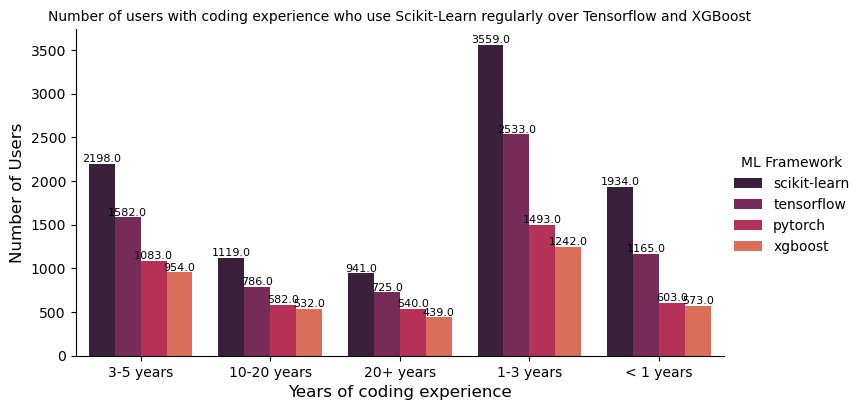

In [82]:
groupDF = df_rpt.groupby(['yrs_code_exp']).sum().reset_index()

ordered_exp = ['3-5 years', '3-5 years', '10-20 years', '20+ years', '1-3 years', '< 1 years']
groupDF = groupDF[groupDF['yrs_code_exp'].isin(ordered_exp)]

order = dict(zip(ordered_exp,list(range(1,7))))
groupDF['order']= groupDF.yrs_code_exp.apply(lambda x:order.get(x))
groupDF.sort_values(by='order', ascending=True, inplace=True)

TITLE = 'Number of users with coding experience who use Scikit-Learn regularly over Tensorflow and XGBoost'

groupDF = pd.melt(groupDF.head(6), id_vars= ['yrs_code_exp'], 
                  value_vars = ['scikit-learn','tensorflow', 'pytorch', 'xgboost'],
                 var_name ='ML Framework', value_name ='count')

show_factor_plot(groupDF, 'yrs_code_exp', 'count', 'ML Framework','Years of coding experience',
                 'Number of Users', TITLE)

<a id='production'></a>
## 4. Deploying machine learning models at work

In [26]:
CAT_SELECT = [12,27] # created a list, so that you can add new question categories to perform group-by summary

df.rename(columns = 
          {'does your current employer incorporate machine learning methods into their business?':'q27'}
         , inplace=True)
select_bool = np.array(header['Category'].isin(CAT_SELECT))
select_bool[df.columns.get_loc('yrs_code_exp')] = True
df_rpt = pd.concat([df.iloc[:,:4],df.iloc[:,select_bool]],axis=1)

df_rpt.rename(columns={'none':'q12_none', 'other':'q12_other'}, inplace=True)
CAT_SELECT = [17]
select_bool = np.array(header['Category'].isin(CAT_SELECT))
df_rpt = pd.concat([df_rpt,df.iloc[:,select_bool]],axis=1)

col_names =[str(n).rstrip().lstrip() for n in df_rpt.columns]
df_rpt.columns=col_names
del col_names

In [27]:
## Data cleaning of question 27

# Replace NaN values with 'No answer'
df_rpt['q27'] = df_rpt['q27'].fillna('No answer')

# search content in parenthesis, if no parenthesis, return original answer string
df_rpt['q27'] = df_rpt['q27'].apply(lambda x: re.search('\((.+?)\)', str(x)).group(0) 
                                    if re.search('\(.+?\)', str(x)) is not None else str(x))

cat_keys = df_rpt['q27'].unique().tolist()
# Assign numeric categories to answers - zip two equal length lists into a dictionary
cat_dict = dict(zip(cat_keys,list(range(1,8)))) 

df_rpt['q27'] = df_rpt['q27'].apply(lambda x: cat_dict.get(x))
cat_dict

{'No answer': 1,
 '(i.e., models in production for less than 2 years)': 2,
 '(i.e., models in production for more than 2 years)': 3,
 '(and may one day put a model into production)': 4,
 'I do not know': 5,
 '(but do not put working models into production)': 6,
 '(we do not use ML methods)': 7}

In [28]:
df_rpt = pd.concat([df_rpt,pd.get_dummies(df_rpt['q27'], prefix='q27')],axis=1)

### 4.1 Popular languages used by coders who deploy ML models at work

In [29]:
popCodeExp

# Note that percentage in this section will not add up because number of respondents polled in each
# coding experience category varies from one to another. For example, one person from 1-3 years 
# contributes 1/6459 = .015% whereas one person from 20+ years category 1/1537 =  0.06%, 
# which is a 4 fold increase.

yrs_code_exp
1-3 years                    6459
10-20 years                  1801
20+ years                    1537
3-5 years                    3399
5-10 years                   2556
< 1 years                    5454
I have never written code    2037
Name: yrs_code_exp, dtype: int64

In [30]:
groupDF = df_rpt.groupby(['yrs_code_exp','python']).sum()
groupDF = groupDF.apply(lambda x: 100*x/popCodeExp).reset_index()

pyexp_dict = {0: 'No Python', 1: 'Python'}
groupDF['python'] = groupDF['python'].apply(lambda x: pyexp_dict.get(x))
groupDF = groupDF[['yrs_code_exp','python','q27_2','q27_3','q27_6','q27_7']].sort_values(by='q27_2',ascending=False)

groupDF

,yrs_code_exp,python,q27_2,q27_3,q27_6,q27_7
3,10-20 years,Python,11.160466,17.823431,6.607440,8.550805
9,5-10 years,Python,9.976526,16.549296,6.064163,6.846635
5,20+ years,Python,8.262850,19.843852,6.506181,11.125569
7,3-5 years,Python,6.972639,8.649603,4.471904,5.560459
1,1-3 years,Python,3.390618,3.297724,3.096455,5.078185
12,I have never written code,No Python,1.718213,1.865488,1.325479,13.696613
11,< 1 years,Python,1.265127,1.045105,1.448478,6.472314
4,20+ years,No Python,0.780742,1.496422,0.910865,2.472349
2,10-20 years,No Python,0.721821,1.943365,0.721821,1.665741
8,5-10 years,No Python,0.430360,0.821596,0.821596,1.917058


In [31]:
groupDF = df_rpt.groupby(['yrs_code_exp','r']).sum()
groupDF = groupDF.apply(lambda x: 100*x/popCodeExp).reset_index()

pyexp_dict = {0: 'No R', 1: 'R'}
groupDF['r'] = groupDF['r'].apply(lambda x: pyexp_dict.get(x))
groupDF[['yrs_code_exp','r','q27_2','q27_3','q27_6','q27_7']].sort_values(by='q27_2', ascending=False)

,yrs_code_exp,r,q27_2,q27_3,q27_6,q27_7
2,10-20 years,No R,8.772904,15.047196,4.330927,8.162132
8,5-10 years,No R,8.059468,13.458529,4.029734,6.964006
4,20+ years,No R,6.310995,15.094340,4.619388,10.344828
6,3-5 years,No R,5.913504,7.002059,3.118564,5.531039
3,10-20 years,R,3.109384,4.719600,2.998334,2.054414
0,1-3 years,No R,3.003561,2.988079,2.554575,4.412448
5,20+ years,R,2.732596,6.245934,2.797658,3.253090
9,5-10 years,R,2.347418,3.912363,2.856025,1.799687
12,I have never written code,No R,1.718213,1.865488,1.325479,13.696613
7,3-5 years,R,1.353339,2.147690,1.853486,1.235658


### 4.2 Coders with experience in popular ML framework  who deploy complex AI models at work

In [32]:
COL= ['yrs_code_exp', 'ml_framework', 'q27_2', 'q27_3']
TF = pd.DataFrame(columns = COL)

In [33]:
ml_framework_select = ['tensorflow','pytorch','none']

for s in ml_framework_select:
    groupDF = df_rpt.groupby(['yrs_code_exp',s]).sum()
    groupDF = groupDF.apply(lambda x: 100*x/popCodeExp).reset_index()
    groupDF[s] = groupDF[s].apply(lambda x: s if x==1 else '')
    groupDF.rename(columns={s: 'ml_framework'}, inplace=True)
    TF = pd.concat([TF, groupDF[(groupDF['ml_framework']==s)][['yrs_code_exp','ml_framework','q27_2','q27_3']]])

TF.sort_values(by='q27_2', ascending=False, inplace=True)

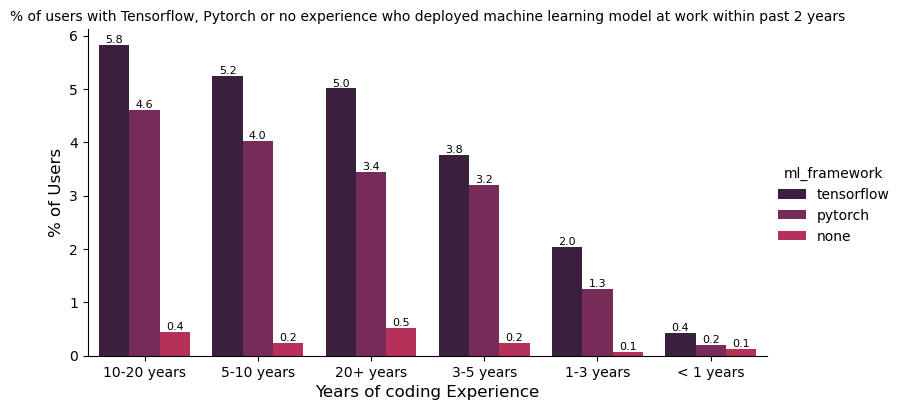

In [34]:
TITLE = '% of users with Tensorflow, Pytorch or no experience who deployed machine learning model at work within past 2 years'

show_factor_plot(TF.iloc[:,:-1], 'yrs_code_exp', 'q27_2', 'ml_framework','Years of coding Experience',
                 '% of Users', TITLE)